In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from wordle import Wordle
from util import stopwatch

plt.style.use("blackontrans")

In [2]:
with stopwatch():
    wordle = Wordle()

2 min, 2.802 sec


In [3]:
metrics = ["expected_value", "minimax", "partitions", "entropy"]
solution_maps = {}

for metric in metrics:
    wordle.metric = metric
    print(metric)
    with stopwatch():
        solution_map = wordle.map_solutions()
    solution_maps[metric] = solution_map

expected_value
51.012 sec
minimax
57.240 sec
partitions
17.889 sec
entropy
58.505 sec


,1,2,3,4,5,6
expected_value,0,55,1130,1090,40,0
minimax,1,53,1001,1154,105,1
partitions,1,75,1232,932,74,1
entropy,0,31,1106,1110,67,1


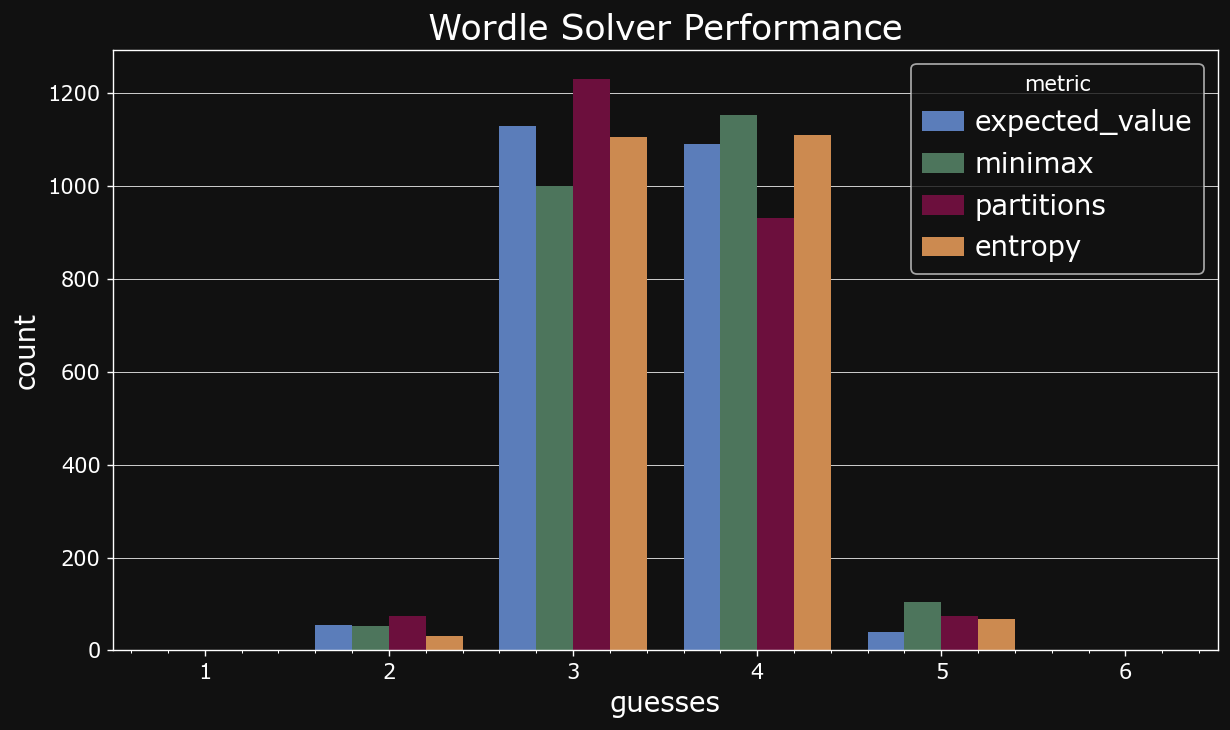

In [4]:
data = pd.concat([pd.DataFrame({"guesses": list(solution_map.leaf_depth_distribution.keys()), "count": list(solution_map.leaf_depth_distribution.values()), "metric": [metric] * len(solution_map.leaf_depth_distribution)}) for metric, solution_map in solution_maps.items()], ignore_index=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="guesses", y="count", hue="metric", ci=None, data=data, ax=ax)
ax.set_title("Wordle solver performance")

table = pd.DataFrame({metric: solution_map.leaf_depth_distribution for metric, solution_map in solution_maps.items()}).sort_index().T.fillna(0).astype(int)
table

In [5]:
common_solution_maps = {}

for metric in metrics:
    wordle.metric = metric
    print(metric)
    possible_guesses = wordle._find_possible_answers()
    with stopwatch():
        solution_map = wordle.map_solutions(possible_guesses=possible_guesses)
    common_solution_maps[metric] = solution_map

expected_value
9.761 sec
minimax
10.862 sec
partitions
3.504 sec
entropy
10.802 sec


,1,2,3,4,5,6
expected_value,1,61,1074,1089,90,0
minimax,1,64,964,1154,131,1
partitions,1,81,1182,958,89,4
entropy,1,46,1034,1137,94,3


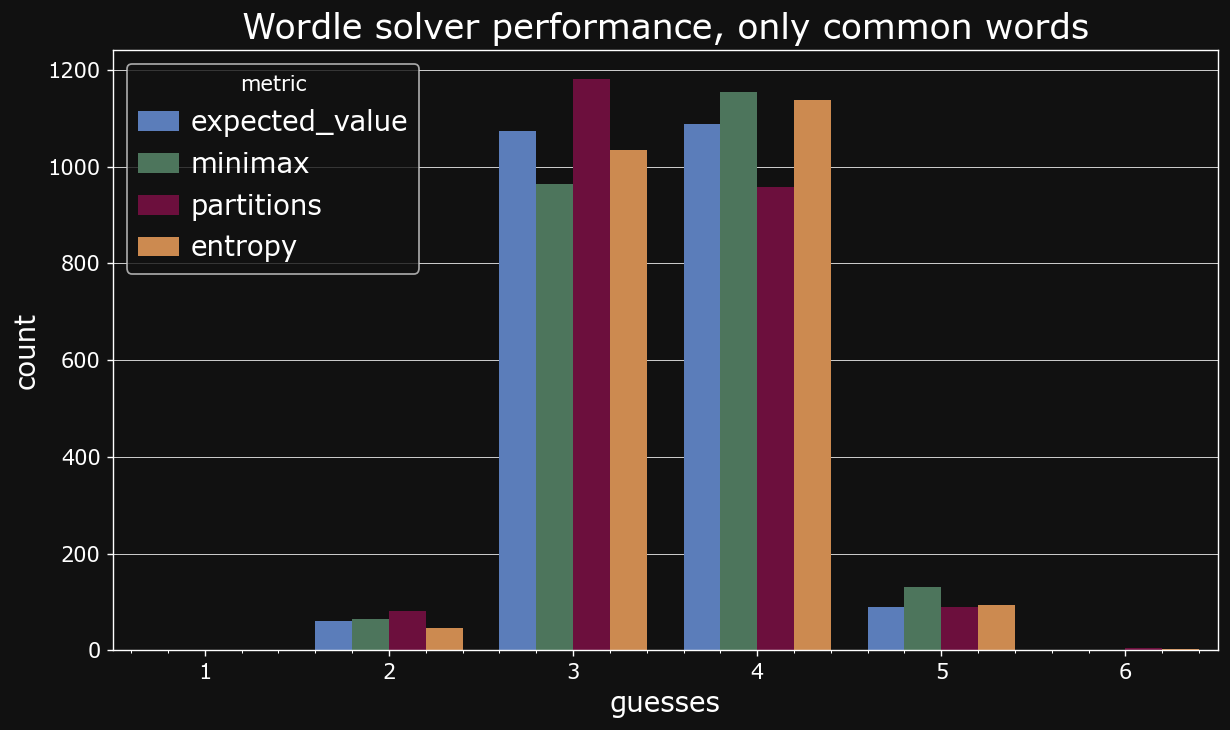

In [6]:
data = pd.concat([pd.DataFrame({"guesses": list(solution_map.leaf_depth_distribution.keys()), "count": list(solution_map.leaf_depth_distribution.values()), "metric": [metric] * len(solution_map.leaf_depth_distribution)}) for metric, solution_map in common_solution_maps.items()], ignore_index=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="guesses", y="count", hue="metric", ci=None, data=data, ax=ax)
ax.set_title("Wordle solver performance, only common words")

table = pd.DataFrame({metric: solution_map.leaf_depth_distribution for metric, solution_map in common_solution_maps.items()}).sort_index().T.fillna(0).astype(int)
table

In [7]:
hard_solution_maps = {}
wordle.hard_mode = True

for metric in metrics:
    wordle.metric = metric
    print(metric)
    with stopwatch():
        solution_map = wordle.map_solutions()
    hard_solution_maps[metric] = solution_map

expected_value
1.376 sec
minimax
1.629 sec
partitions
1.108 sec
entropy
1.377 sec


,1,2,3,4,5,6,7,8
expected_value,0,92,1014,982,184,35,7,1
minimax,1,93,918,1030,213,44,13,3
partitions,1,124,1085,899,167,30,8,1
entropy,0,78,1051,955,180,42,7,2


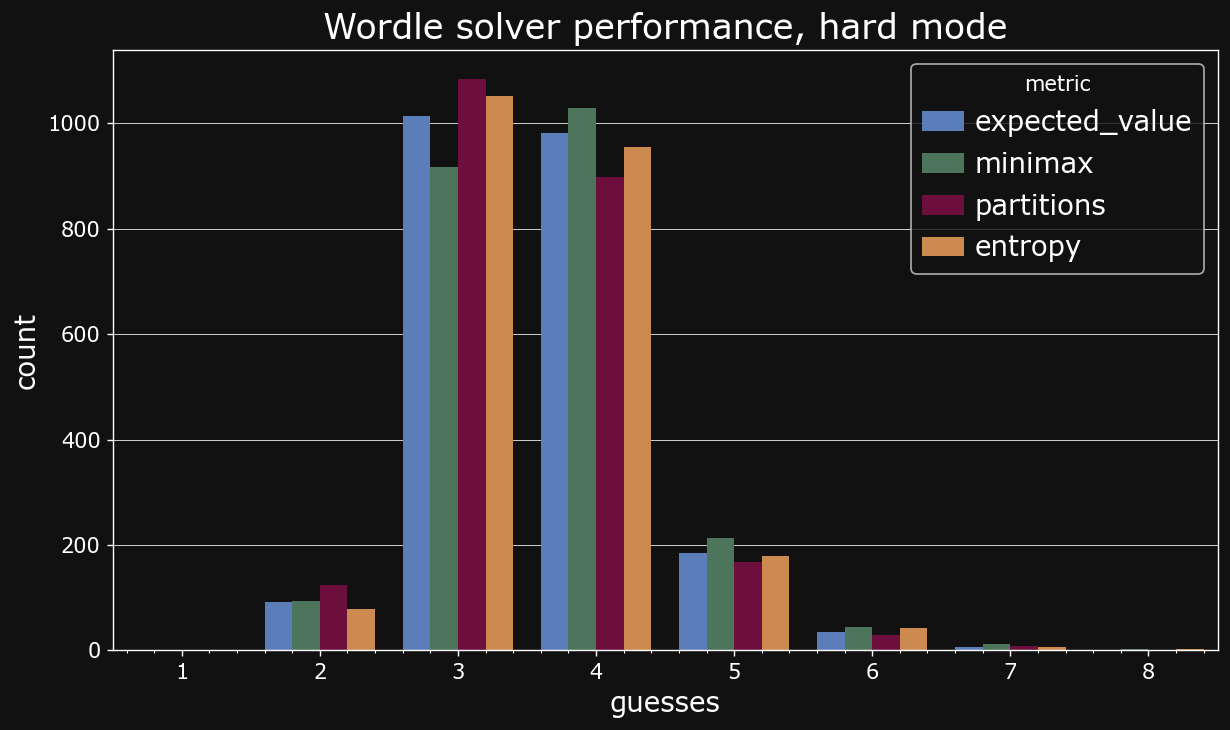

In [8]:
data = pd.concat([pd.DataFrame({"guesses": list(solution_map.leaf_depth_distribution.keys()), "count": list(solution_map.leaf_depth_distribution.values()), "metric": [metric] * len(solution_map.leaf_depth_distribution)}) for metric, solution_map in hard_solution_maps.items()], ignore_index=True)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.barplot(x="guesses", y="count", hue="metric", ci=None, data=data, ax=ax)
ax.set_title("Wordle solver performance, hard mode")

table = pd.DataFrame({metric: solution_map.leaf_depth_distribution for metric, solution_map in hard_solution_maps.items()}).sort_index().T.fillna(0).astype(int)
table